In [92]:
### sites used:
### http://www.omdbapi.com/
### we're parsing this shit in json

# import json
import urllib.request
import json
import pandas as pd


def escape_names(name):
    name=name.replace(" ", "+").replace(":","%3A")
    return name

titles=["iron+man","the+incredible+hulk","iron+man+2","thor","Captain America: The First Avenger","The Avengers","Iron Man 3","Thor: The Dark World","Captain America: The Winter Soldier","Guardians of the Galaxy","Avengers: Age of Ultron","Ant-Man","Captain America: Civil War","Doctor Strange"]
years=[2008,2008,2010,2011,2011,2012,2013,2014,2014,2015,2015,2016,2016]

### Hardcoding budgets because no effective API for this:
budgets=[140,150,200,150,140,220,200,170,170,170,250,130,250,165]

movie_df=pd.DataFrame()
for i,title in enumerate(titles):
    title=escape_names(title)
    wp = urllib.request.urlopen("http://www.omdbapi.com/?t="+title)#+"&"+str(years[i]))
    data=pd.read_json(wp)
    data=data.iloc[1]
    movie_df=movie_df.append(data)
# pw = wp.read()
# print(pw)
money_array=[]
rating_array=[]
for j in range(len(movie_df['BoxOffice'])):
    money_array.append(float(movie_df['BoxOffice'].iloc[j].replace("$", "").replace(",", "")))
    rating_array.append(int(movie_df['Ratings'].iloc[j]['Value'].replace("%", "")))
movie_df['float_boxoffice']=pd.Series(money_array, index=movie_df.index)
movie_df['Rotten Tomatoes Score']=pd.Series(rating_array, index=movie_df.index)
movie_df=movie_df.reset_index()
del movie_df['index']



In [93]:
movie_df['budget']=pd.Series(budgets, index=movie_df.index)

In [94]:
movie_df['float_boxoffice']=pd.Series(money_array, index=movie_df.index)

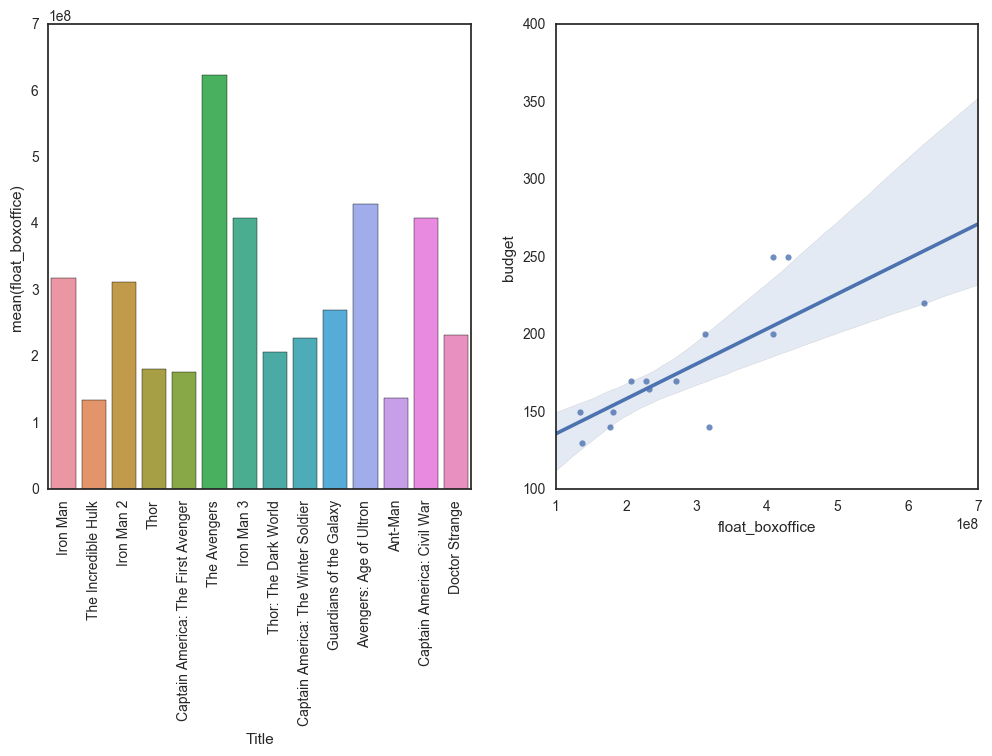

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
sns.set_style("white")
# movie_df=movie_df.reset_index()
# money_array=[]

# for j in range(len(movie_df['BoxOffice'])):
#     money_array.append(float(movie_df['BoxOffice'].iloc[j].replace("$", "").replace(",", "")))
# movie_df.plot.bar(x=movie_df['Title'], y=movie_df['float_boxoffice'])  
sns.barplot(x='Title', y='float_boxoffice', data=movie_df,ax=ax1)
ax1.set_xticklabels(movie_df['Title'],rotation=90)
sns.regplot(x='float_boxoffice', y='budget',data=movie_df,ax=ax2)

fig

In [108]:
#priors from linear regression
x =movie_df['budget']
y=movie_df['float_boxoffice']
# x=x/max(x)
y=y/max(y)
# from scipy import linspace, polyval, polyfit, sqrt, stats, randn
# (ar,br)=polyfit(x,y,1)


In [109]:

with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=1, testval=1.)
    intercept = Normal('Intercept', 1, sd=20)
    x_coeff = Normal('x', 1, sd=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sd=sigma, observed=y)

    # Inference!
    start = find_MAP() # Find starting value by optimization
    step = pm.NUTS() # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, start=start, progressbar=False) # draw 2000 posterior samples using NUTS sampling

         Current function value: 1.720199
         Iterations: 30
         Function evaluations: 125
         Gradient evaluations: 113


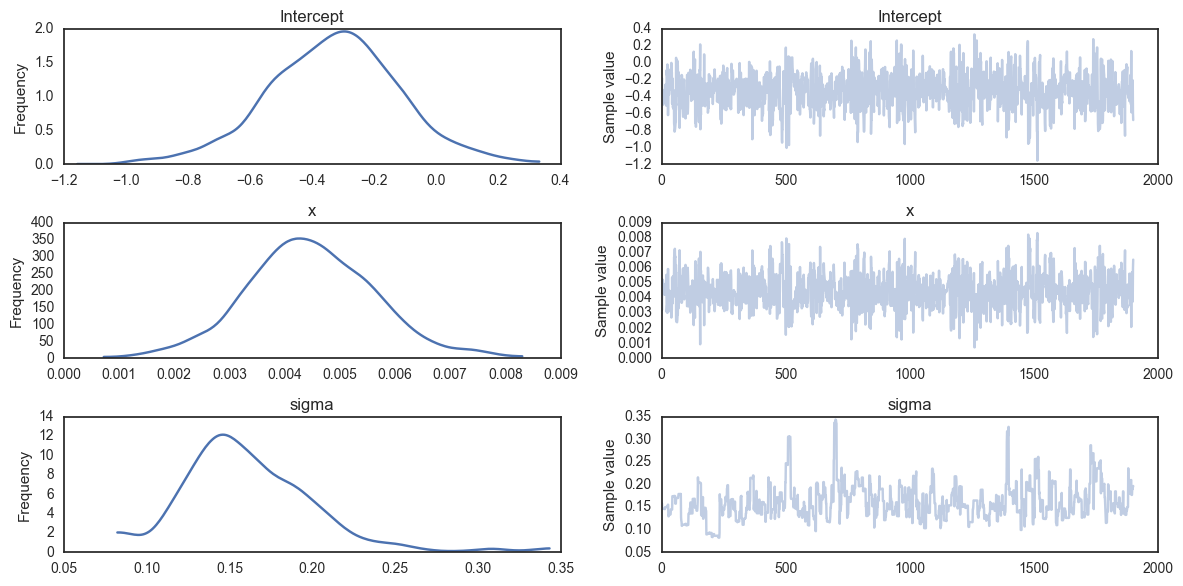

In [110]:
plt.close('all')
fig3=plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.show()

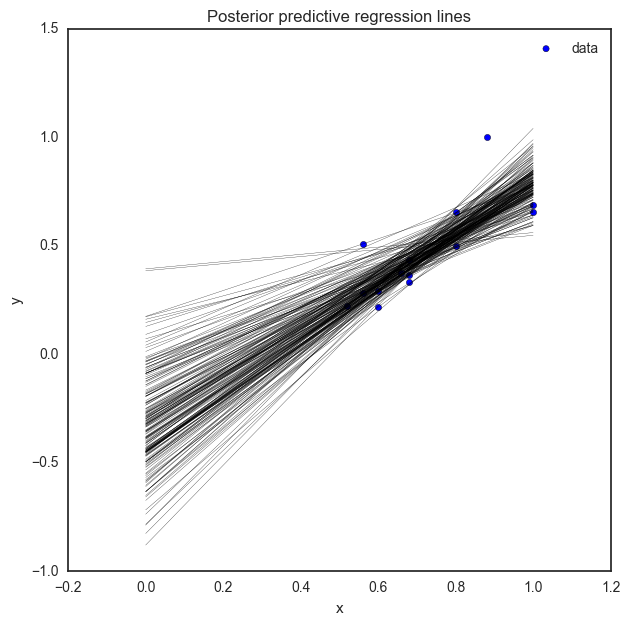

In [105]:
plt.close('all')
fig4=plt.figure(figsize=(7, 7))
plt.scatter(x, y, label='data')
glm.plot_posterior_predictive(trace, samples=100)
# plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');
plt.show()

In [30]:
trace[0]

{'Intercept': 8.5093715659489622,
 'sigma': 307628352.51817715,
 'sigma_log_': 19.544402964684139,
 'x': 10.204811694345345}